In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [4]:
import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

import helpers
import data_processer as dp
import lstm
import ee_model

['d:\\Repositories\\PhD\\notebooks\\CSECS_2025', 'd:\\HackoAcademic_Anaconda\\python312.zip', 'd:\\HackoAcademic_Anaconda\\DLLs', 'd:\\HackoAcademic_Anaconda\\Lib', 'd:\\HackoAcademic_Anaconda', '', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\win32', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\win32\\lib', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\Pythonwin', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\setuptools\\_vendor', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [14]:
import importlib

importlib.reload(helpers)

<module 'helpers' from 'D:\\Repositories\\PhD\\src\\functions\\helpers.py'>

In [3]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")

In [5]:
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [30]:
X = df[['resultant_vibration_magnitude_normal_dist']]
y = df['FAULT']

In [33]:
X

,resultant_vibration_magnitude_normal_dist
0,-1.104839
1,-1.113447
2,-1.139087
3,-1.076103
4,-1.114673
...,...
390057,0.595405
390058,0.601918
390059,0.601564
390060,0.598807


In [32]:
y

0         1
1         1
2         1
3         1
4         1
         ..
390057    0
390058    0
390059    0
390060    0
390061    0
Name: FAULT, Length: 390062, dtype: int64

In [25]:
xgbc = XGBClassifier()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, shuffle = True)

In [13]:
xgbc.fit(X_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
y_train_pred, y_test_pred, xgbc = helpers.train_and_predict_xgbc(X_train.values, y_train.values, X_test.values)

In [37]:
from sklearn.metrics import roc_curve

In [38]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thrs = roc_curve(y_test, y_test_pred)

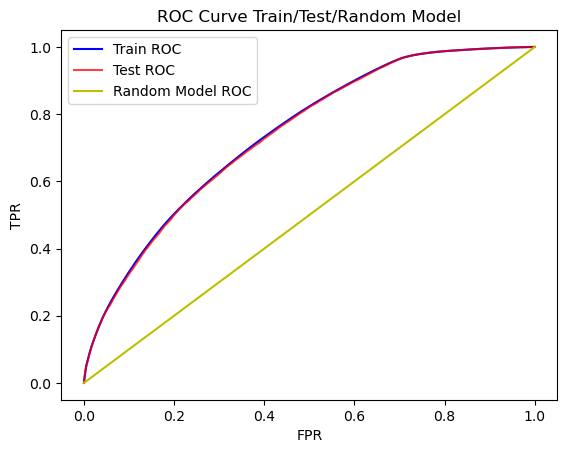

In [39]:
helpers.plot_roc((fpr_train, tpr_train), (fpr_test, tpr_test), roc_bm = None)

In [41]:
best_thr = helpers.get_best_thr(tpr_test, fpr_test, thrs)

In [42]:
helpers.print_scores(y_test, np.where(y_test_pred >= best_thr, 1, 0))

F1: 0.688
Accuracy: 0.666
Precision: 0.688
ROC AUC: 0.664
Recall: 0.688


In [45]:
helpers.confusion_matrix(y_test, np.where(y_test_pred >= best_thr, 1, 0))

RecursionError: maximum recursion depth exceeded